# Title: Analysis of Israel Legacy Data  

### Decision parameters (Meta Data for building Mtree)

Brief description of following parameters needed for building Mtree

In [3]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg1', 'sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['mult', 'plsr', 'randomforest', 'cubist', 'svr', 'ridge', 'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Sand', 'Silt', 'Clay', 'TOC', 'CaCO3']

# 3. Available preprocessing for Target data -------------------------------------- (3)
prepare_target = ['none', 'minmax']

# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'fod', 'fod2', 'continuum', 'log']

# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28,30,\
                   32,34,36,38,40, 45, 50, 55, 60, 70, 80, 90, 100]

# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A', 'green', 'blue']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

## Spectra (After Noise and Outliers removal)

#### Spectra is smoothed using savitzky golay 2nd order at window length 51.

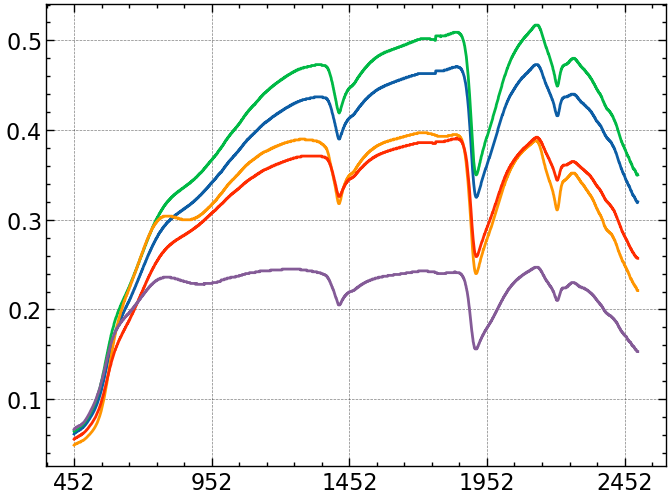

In [4]:
for i in range (0,5,1):
    spectra.iloc[i,1:].plot()

## Spectral Preprocessing (FOD, Continuum, and Log)

### 1. First Order Derivative

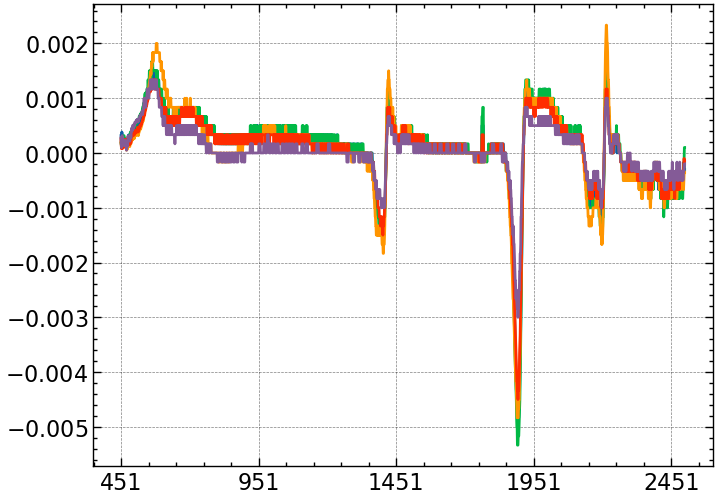

In [5]:
for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()

### 2. Continuum Removed

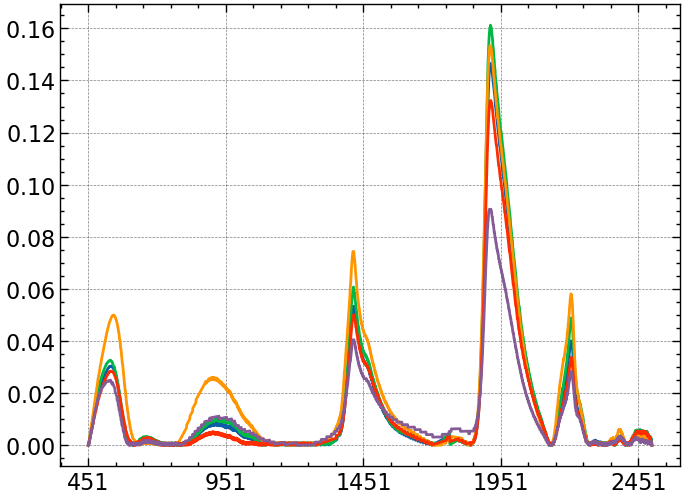

In [6]:
for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()    

### 3. 1/logR Transformation

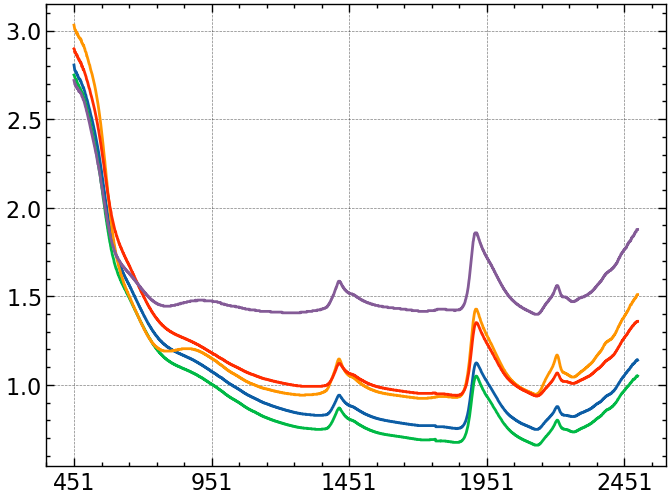

In [7]:
for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec)

   &emsp; ***sampled _spec[n]***:  represents smoothed spectra resampled to n bands. 

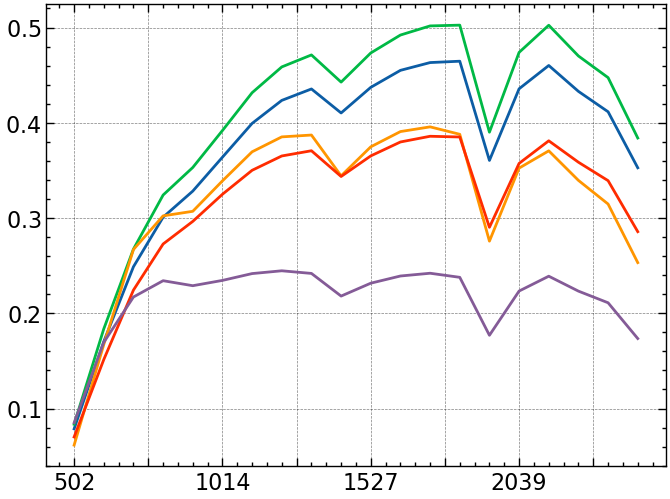

In [8]:
for i in range (0,5,1):
    sampled_spec[20].iloc[i,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

&emsp; ***sampled _cr[n]***:  represents continuum removed spectra resampled to n bands. 

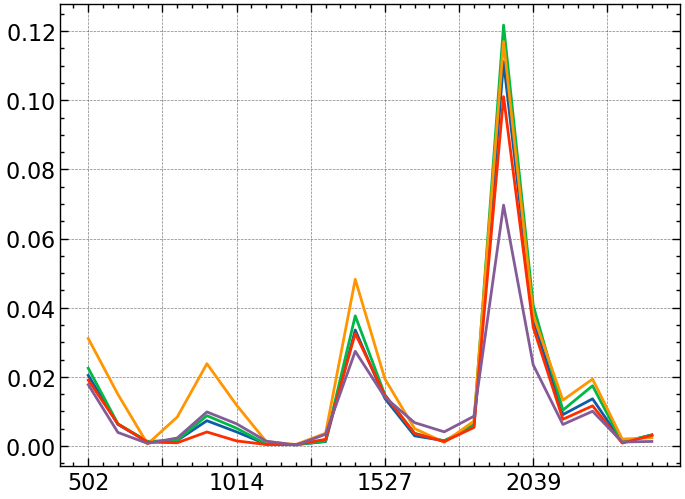

In [9]:
for i in range (0,5,1):
    sampled_cr[20].iloc[i,:].plot()

### 3. Sampled FOD  (sampled_fod and fod_sampled)

&emsp; ***sampled _fod[n]***:  represents first order derivative spectra resampled to n bands.


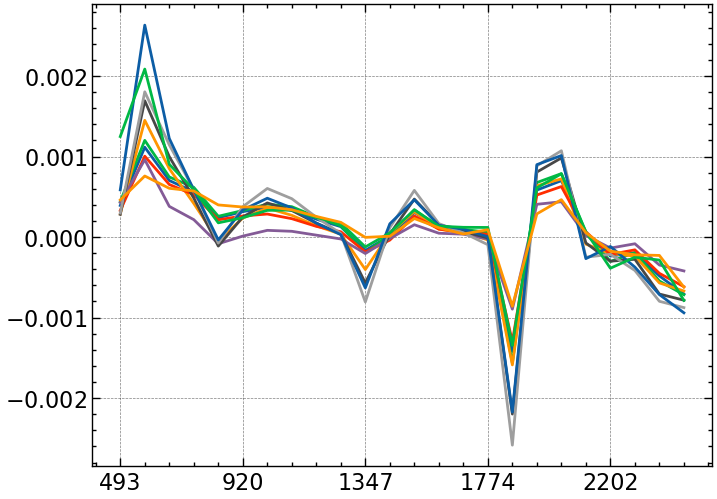

In [10]:
for i in range (0,10,1):
    sampled_fod[24].iloc[i,:].plot()

&emsp; ***fod_sampled[n]***:  represents first order derivative of the resampled spectras at n bands. 

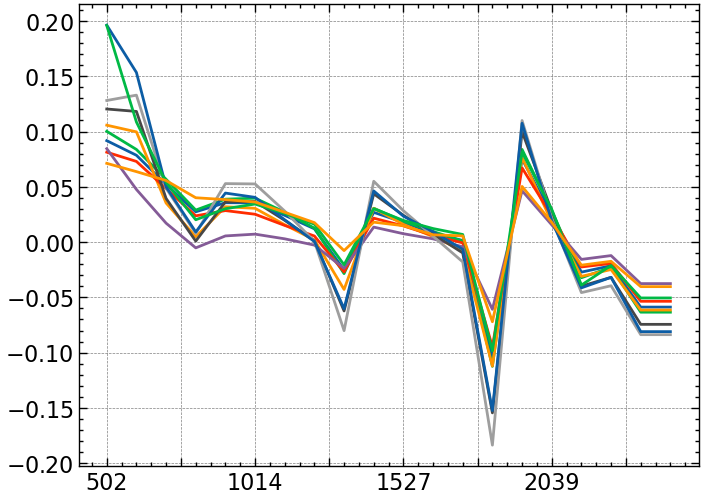

In [11]:
for i in range (0,10,1):
    fod_sampled[20].iloc[i,:].plot()

### 4. Sampled Log (sampled_log)

 &emsp; ***sampled _log[n]***:  represents logarithmic reflectance inverse spectras resampled to n bands. 

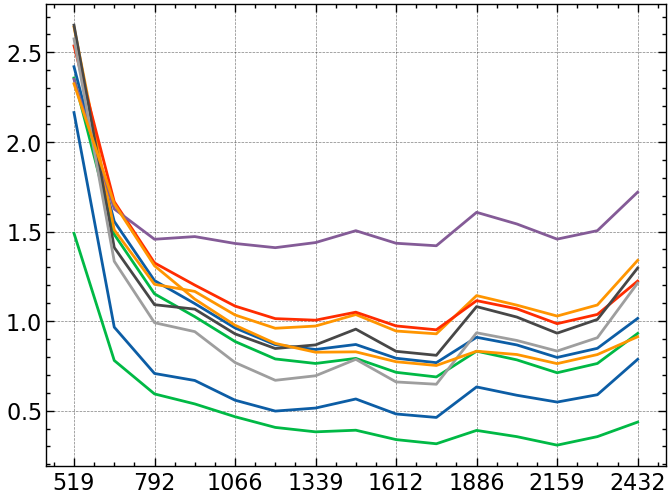

In [12]:
for i in range (0,10,1):
    sampled_log[15].iloc[i,:].plot()

## Correlation between wavelengths and Targets

#####   &emsp; It represents correlation of spectras resampled to 50 bands with different attributes.

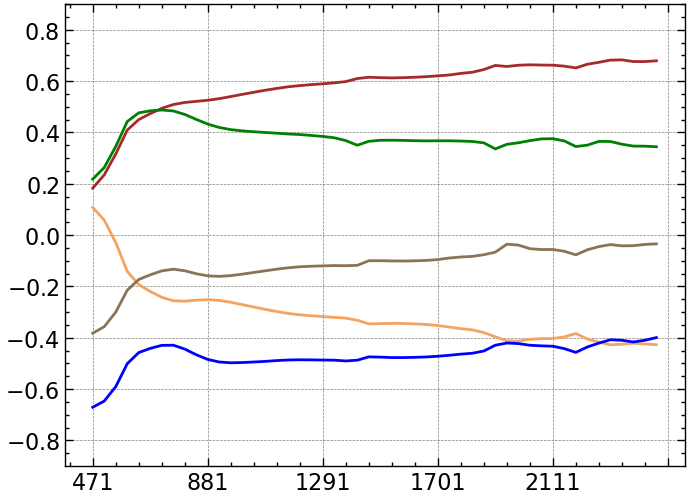

In [13]:
plot_corr ('Sand', 'none', 50)
plot_corr ('Silt', 'none', 50)
plot_corr ('Clay', 'none', 50)
plot_corr ('TOC', 'none', 50)
plot_corr ('CaCO3', 'none', 50)

# Models, Performance, and Important Features

In [14]:
feature_scores = {}
model_details ={}

In [15]:
# import import_ipynb 
# from BestModels import *

## 1. Sand Models

### Best performances corresponding to different methods.

In [16]:
best_score_for(Mtree, 'Sand', 'r2')

For:Sand-> ['r2', 0.64, 'Spec:', 'fod', 'bands:', 16, 'Tar:', 'none'] :mult
For:Sand-> ['r2', 0.33, 'Spec:', 'fod', 'bands:', 9, 'Tar:', 'none'] :plsr
For:Sand-> ['r2', 0.64, 'Spec:', 'fod2', 'bands:', 17, 'Tar:', 'minmax'] :randomforest
For:Sand-> ['r2', 0.69, 'Spec:', 'none', 'bands:', 50, 'Tar:', 'none'] :cubist
For:Sand-> ['r2', 0.34, 'Spec:', 'log', 'bands:', 90, 'Tar:', 'minmax'] :svr
For:Sand-> ['r2', 0.31, 'Spec:', 'none', 'bands:', 0, 'Tar:', 'minmax'] :ridge
For:Sand-> ['r2', 0.69, 'Spec:', 'fod', 'bands:', 24, 'Tar:', 'minmax'] :gbrt


### Cubist: Best Model

Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - none, n_bands - 50, Tar - none] :   **cubist**   <br/><br/>
***Description***: We get the best model for sand when we use cubist method. \
While training the model we utilize the smoothed spectra resampled to 50 bands and
sand values are used without any preprocessing.

In [58]:
sand_model_cubist = Cubist(n_rules = 50, n_committees = 5, random_state = 42) 
sand_model_cubist.fit(sampled_spec[50], T[0])

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}


Cubist(n_committees=5, n_rules=50, random_state=42)

 The 50 most important wavebands for cubist model :

In [48]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_spec[50], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'Cubist', 'spec': sampled_spec[50], 'spec_proc': 'spectra', 'n_bands': 50}

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}


 Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
 For cubist model 840, 553 and 594 are the three most important wavebands.

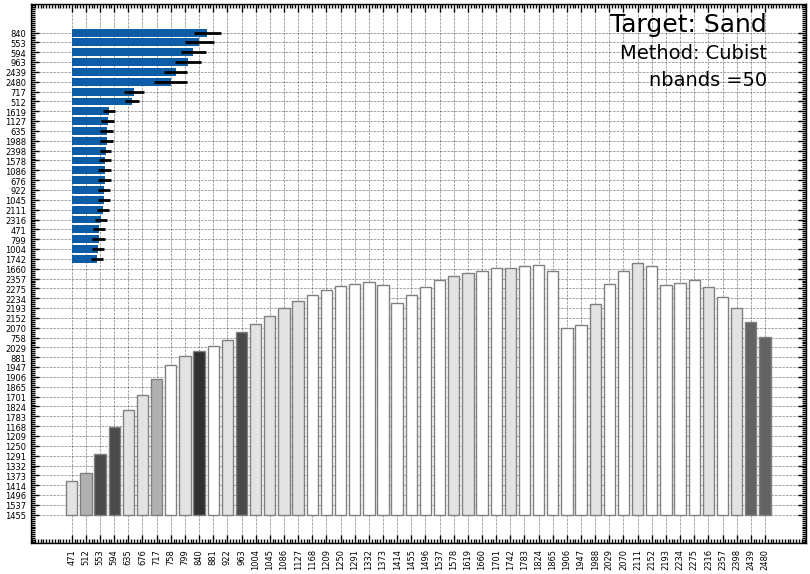

In [49]:
show_important_features_for ('Sand', model_details, feature_scores, 10, 50, 1)

### Model Accuracy versus  n_bands 

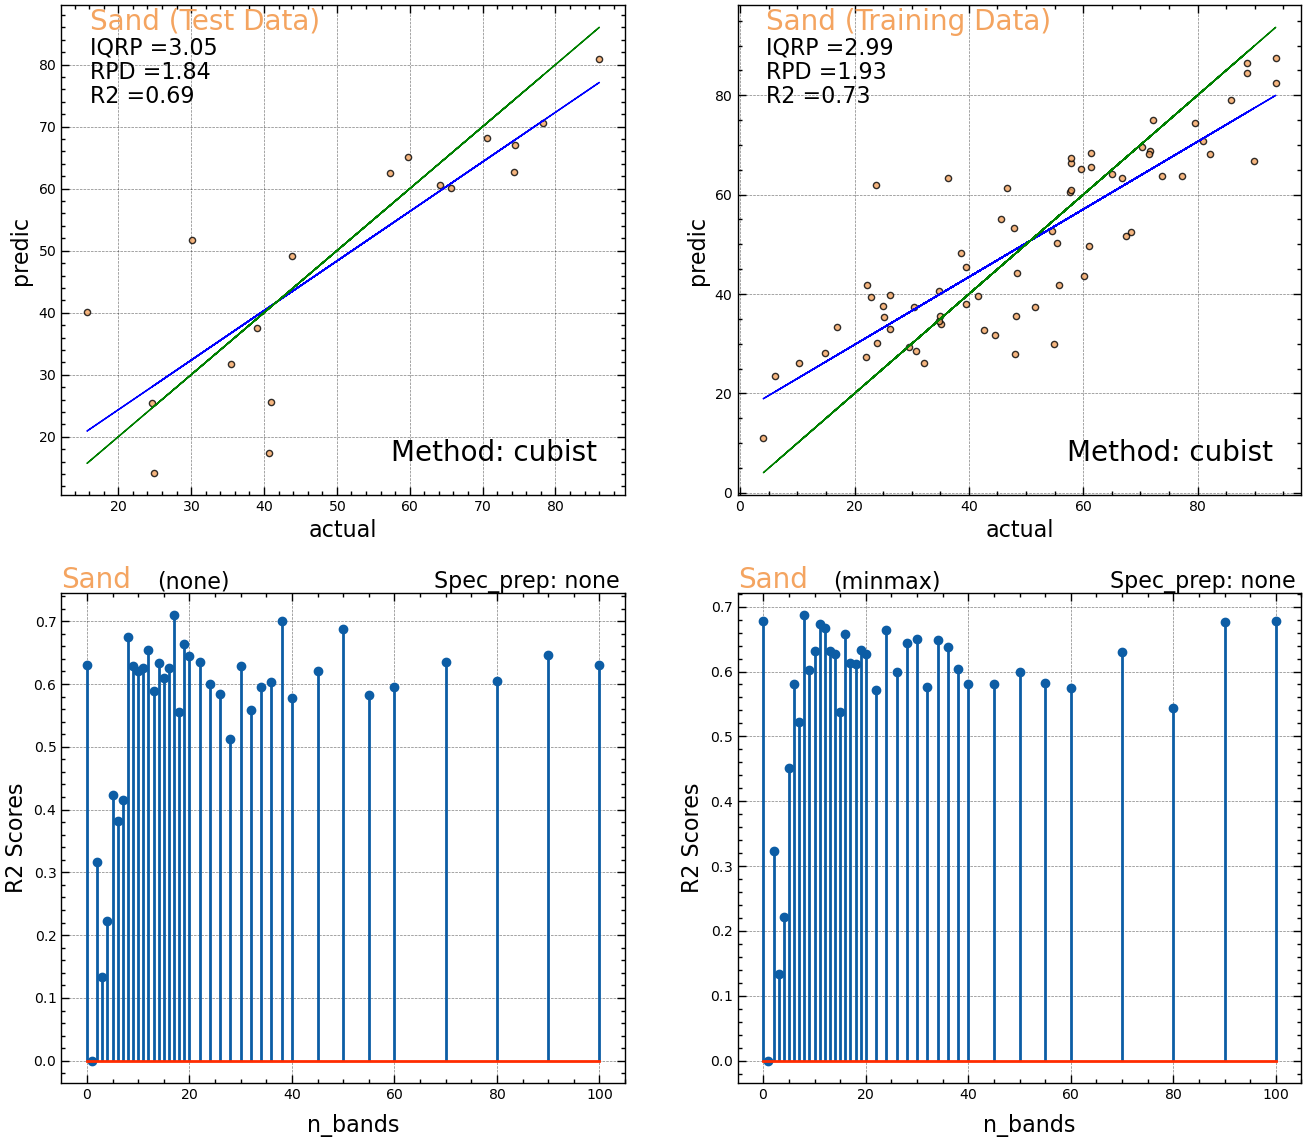

In [17]:
#For:Sand-> ['r2', 0.69, 'Spec:', 'none', 'bands:', 50, 'Tar:', 'none'] :cubist
plot_model_acc ('cubist', 'Sand', 'none', 'none', 50)

### gbrt : best model

Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - fod, n_bands - 24, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for sand when we use gbrt method. \
While training the model we utilize the first order derivative spectra resampled to 24 bands and
sand values are used with minmax normalization.

In [61]:
sand_model_gbrt = GradientBoostingRegressor()  
sand_model_gbrt.fit(sampled_fod[24], T[0])

GradientBoostingRegressor()

24 most important wavebands for gbrt model:

In [21]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, sampled_fod[24], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': sampled_fod[24], 'spec_proc': 'fod', 'n_bands': 24}

Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
For gbrt model 1433 is the most important waveband.

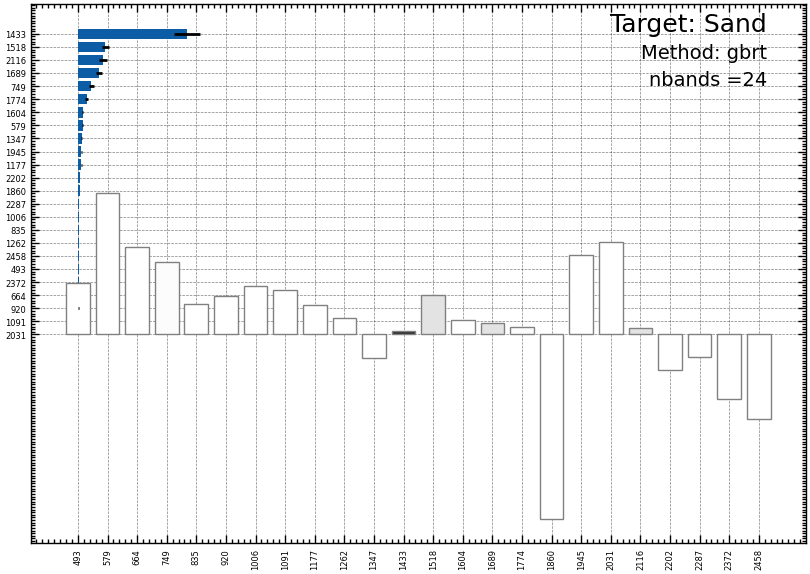

In [22]:
show_important_features_for ('Sand', model_details, feature_scores, 10, 9000, 1)

### Model Accuracy versus n_bands

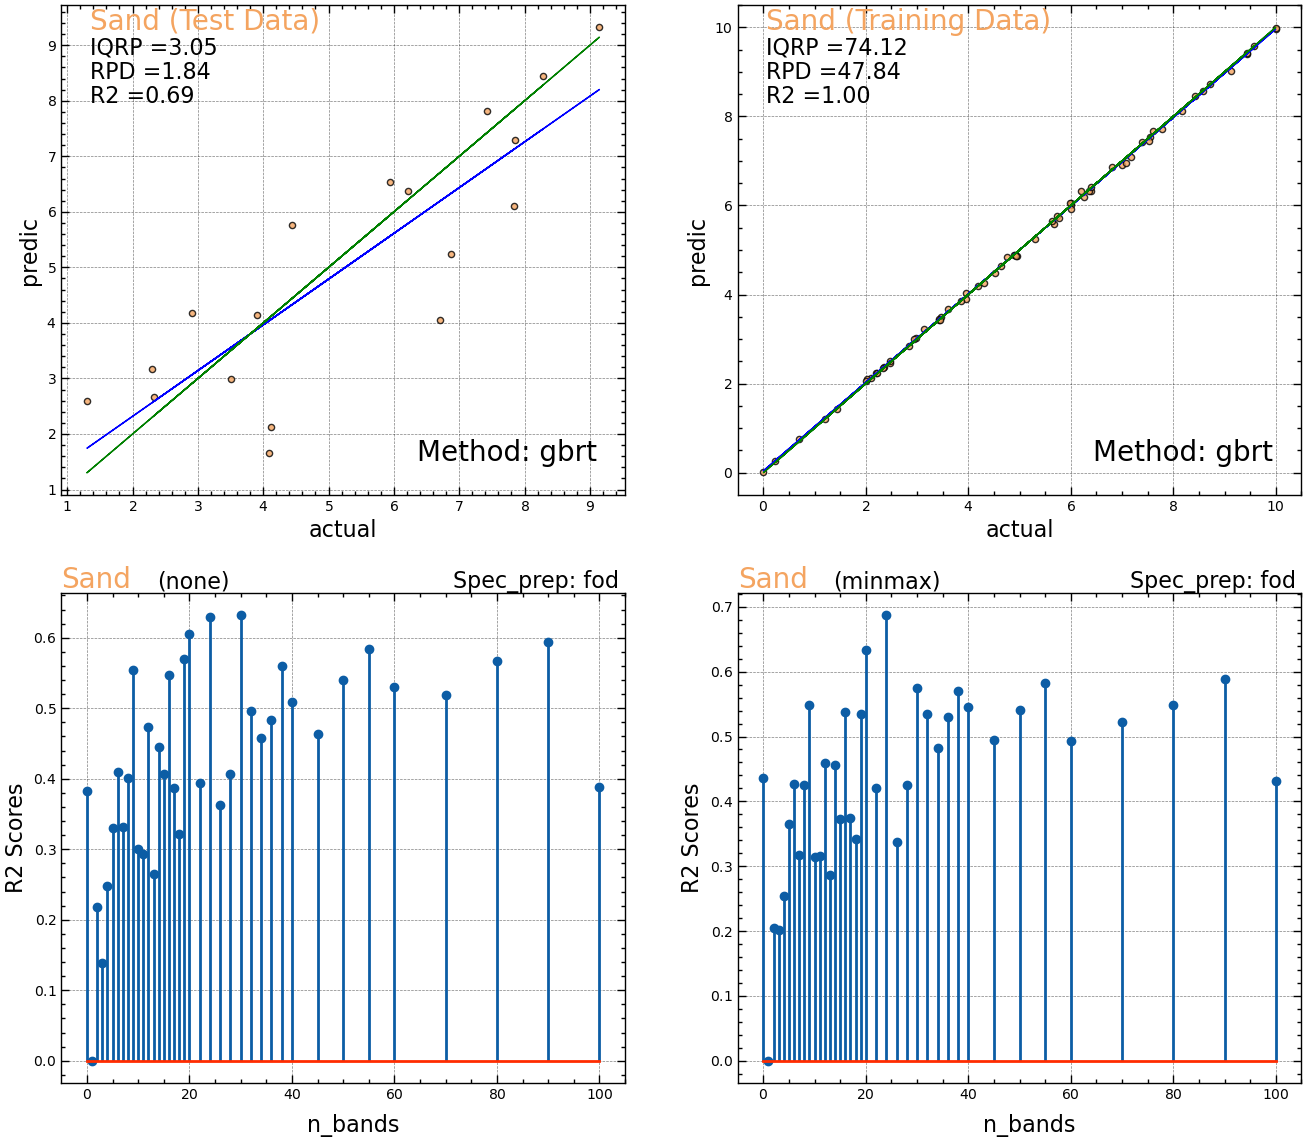

In [20]:
# For:Sand-> ['r2', 0.69, 'Spec:', 'fod', 'bands:', 24, 'Tar:', 'minmax'] :gbrt
plot_model_acc ('gbrt', 'Sand', 'minmax', 'fod', 24)

##  2. Silt Model 

### Best performances corresponding to different methods.

In [23]:
best_score_for(Mtree, 'Silt', 'r2')

For:Silt-> ['r2', 0.43, 'Spec:', 'fod', 'bands:', 8, 'Tar:', 'none'] :mult
For:Silt-> ['r2', 0.17, 'Spec:', 'fod', 'bands:', 28, 'Tar:', 'minmax'] :plsr
For:Silt-> ['r2', 0.5, 'Spec:', 'fod2', 'bands:', 12, 'Tar:', 'none'] :randomforest
For:Silt-> ['r2', 0.42, 'Spec:', 'fod2', 'bands:', 32, 'Tar:', 'minmax'] :cubist
For:Silt-> ['r2', 0.17, 'Spec:', 'continuum', 'bands:', 4, 'Tar:', 'minmax'] :svr
For:Silt-> ['r2', 0.29, 'Spec:', 'log', 'bands:', 0, 'Tar:', 'none'] :ridge
For:Silt-> ['r2', 0.44, 'Spec:', 'fod2', 'bands:', 10, 'Tar:', 'none'] :gbrt


### Randomforest : Best Model

Silt -> [ iqrp - **2.04**, r2 - **0.5**, Spec - fod2, n_bands - 12, Tar - none] :   **random**  <br/><br/>
***Description***: We get the best model for silt when we use randomforest method. \
While training the model we utilize the first order derivative (of the smoothed spectra which is resampled to 12 bands) and
silt values are used without any preprocessing.

In [65]:
silt_model_rand = RandomForestRegressor(random_state= 23)
silt_model_rand.fit(fod_sampled[12], T[1])

RandomForestRegressor(random_state=23)

12 most important wavebands for randomforest model :

In [25]:
feature_scores['Silt'] = permutation_importance(silt_model_rand, fod_sampled[12], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'rand', 'spec': fod_sampled[12], 'spec_proc': 'fod2', 'n_bands': 12}

Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
 For randomforest model 707, 1390 and 1561 are the three most important wavebands.

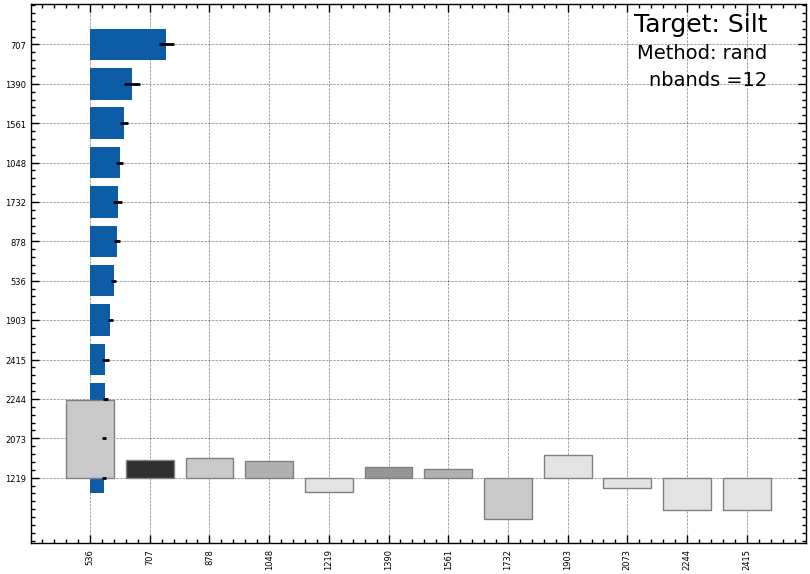

In [26]:
show_important_features_for ('Silt', model_details, feature_scores, 5, 10, 5)

### Model Accuracy versus n_bands

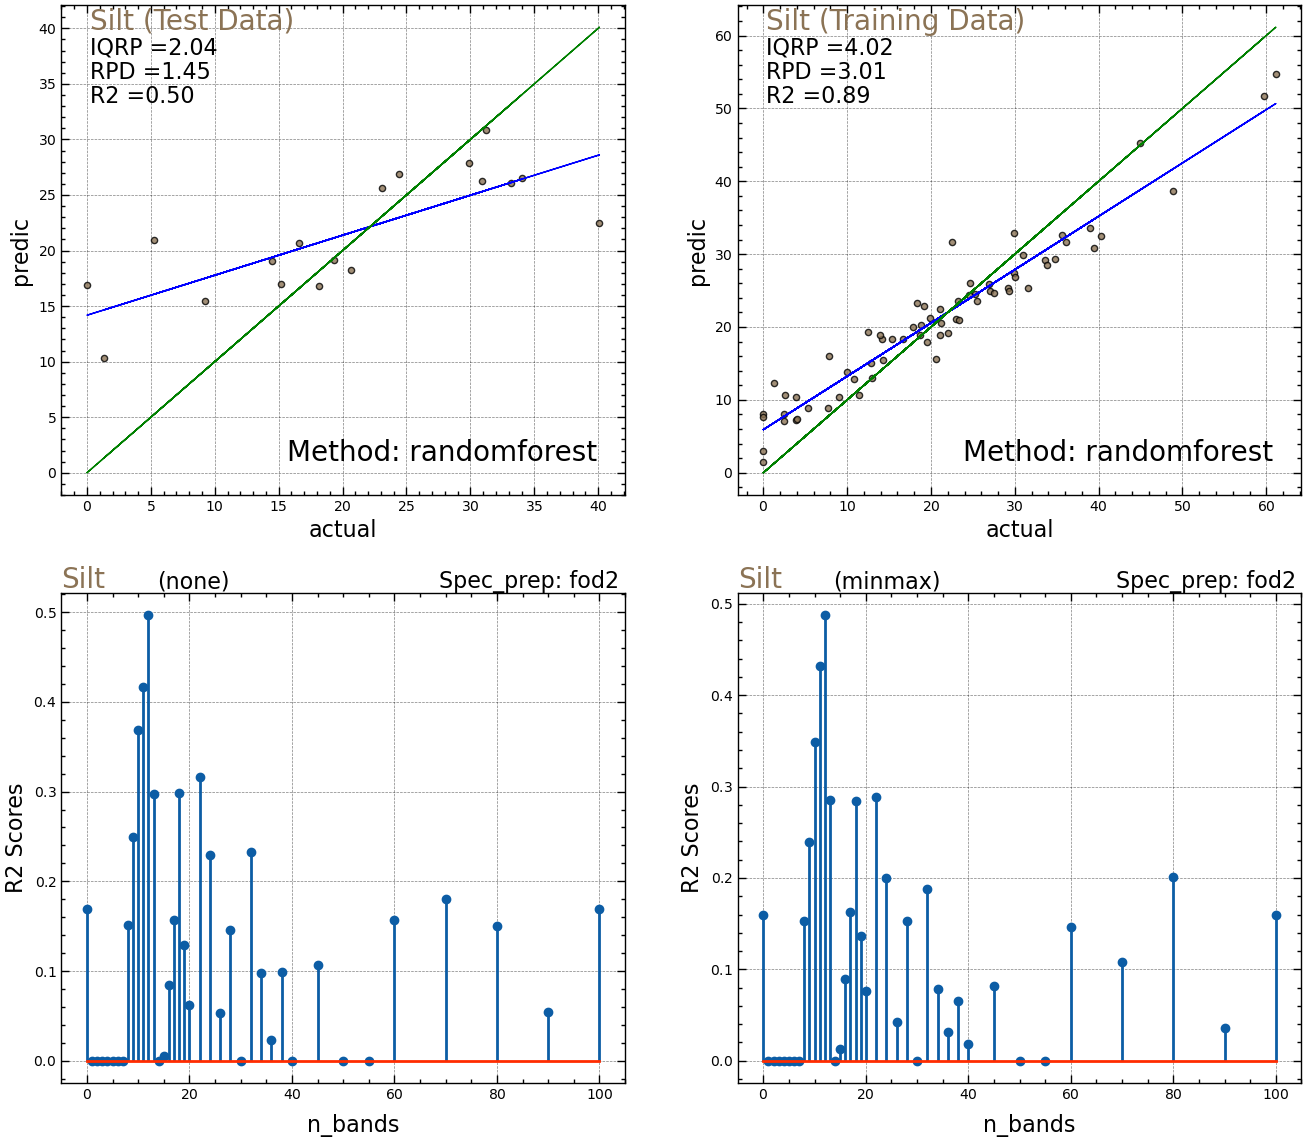

In [24]:
#For:Silt-> ['r2', 0.5, 'Spec:', 'fod2', 'bands:', 12, 'Tar:', 'none'] :randomforest
plot_model_acc ('randomforest', 'Silt', 'none', 'fod2', 12)

## 3. Clay Models  

### Best performances corresponding to different methods.

In [27]:
best_score_for(Mtree, 'Clay', 'r2')

For:Clay-> ['r2', 0.77, 'Spec:', 'log', 'bands:', 15, 'Tar:', 'minmax'] :mult
For:Clay-> ['r2', 0.45, 'Spec:', 'fod', 'bands:', 2, 'Tar:', 'none'] :plsr
For:Clay-> ['r2', 0.62, 'Spec:', 'continuum', 'bands:', 26, 'Tar:', 'minmax'] :randomforest
For:Clay-> ['r2', 0.69, 'Spec:', 'none', 'bands:', 32, 'Tar:', 'none'] :cubist
For:Clay-> ['r2', 0.46, 'Spec:', 'log', 'bands:', 90, 'Tar:', 'minmax'] :svr
For:Clay-> ['r2', 0.48, 'Spec:', 'log', 'bands:', 0, 'Tar:', 'minmax'] :ridge
For:Clay-> ['r2', 0.77, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :gbrt


### Multilinear : Best Model

Clay -> [ iqrp - **2.99**, r2 - **0.77**, Spec - log, n_bands - 15, Tar - minmax] :   **mult**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the inverse logarithmic reflectance (1/logR) of the smoothed spectra which is resampled to 15 bands and clay values are used by  normalizing it in the range of 0-10.

In [67]:
clay_model_mult = linear_model.LinearRegression()
clay_model_mult.fit(sampled_log[15], NT[2])

LinearRegression()

15 most important wavebands for multiple linear regression model :

In [29]:
feature_scores['Clay'] = permutation_importance(clay_model_mult, sampled_log[15], NT[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'mult', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}

Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
 For mult model 1749, 1612 and 1886 are the three most important wavebands.

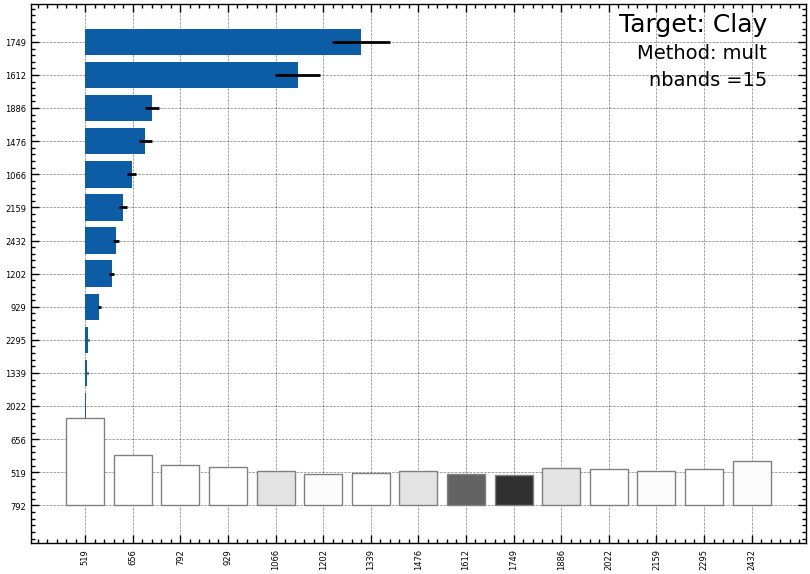

In [30]:
show_important_features_for ('Clay', model_details, feature_scores, 0.001, 1, 2)

### Model Accuracy versus n_bands

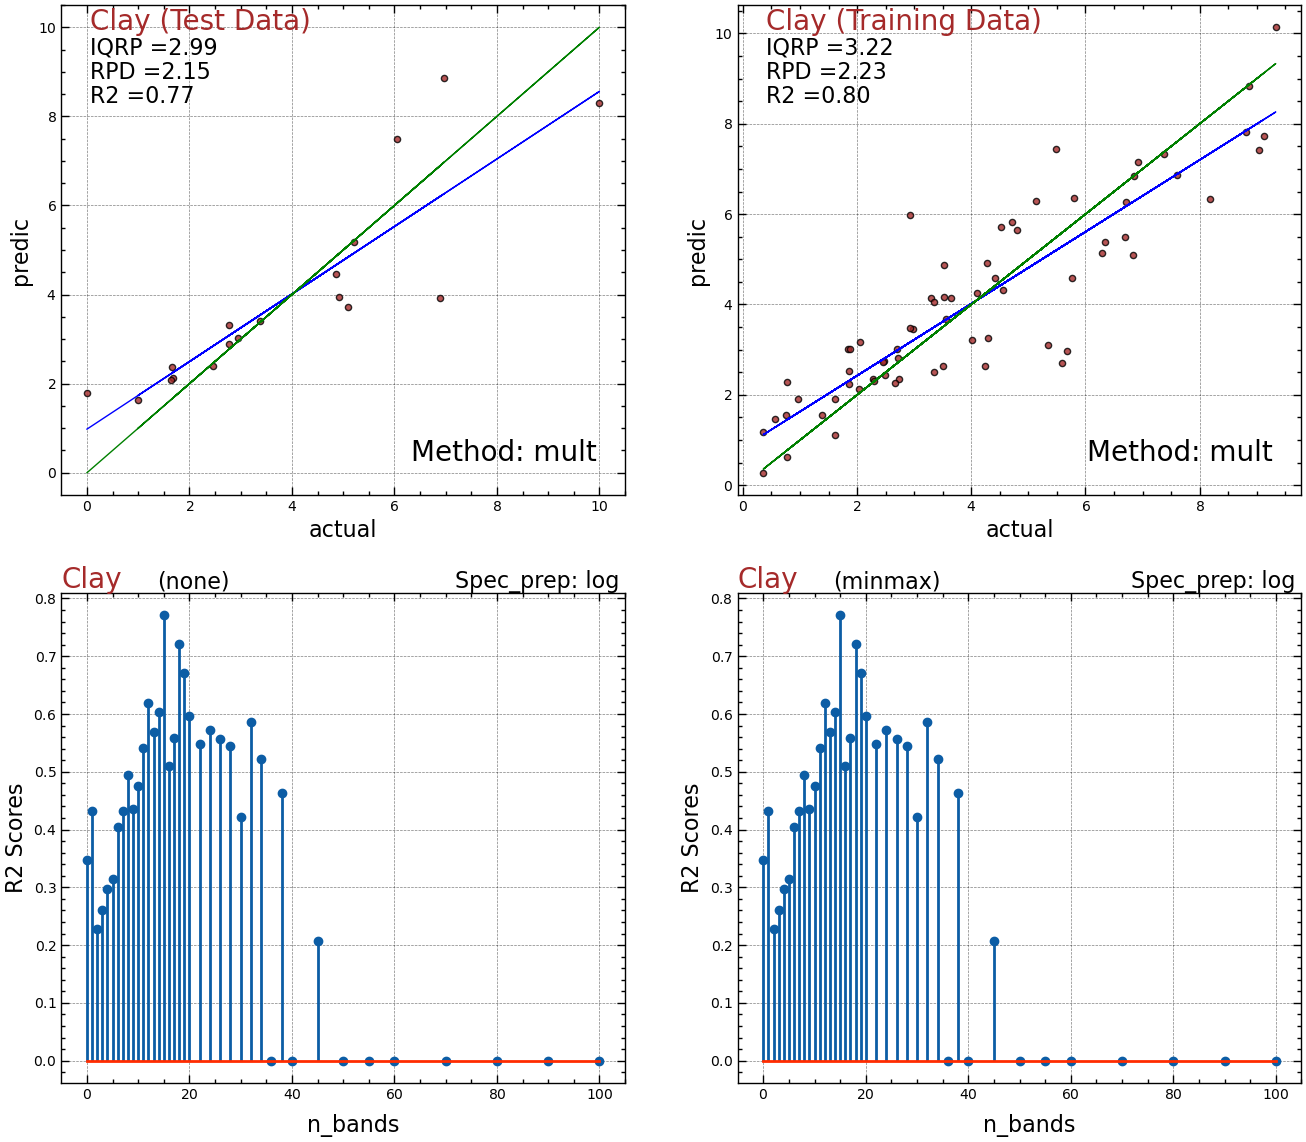

In [28]:
#For:Clay-> ['r2', 0.77, 'Spec:', 'log', 'bands:', 15, 'Tar:', 'minmax'] :mult
plot_model_acc ('mult', 'Clay', 'minmax', 'log', 15)

### gbrt : Best Model 

Clay -> [ iqrp - **2.97**, r2 - **0.77**, Spec - continuum, n_bands - 30, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the continum removed smoothed spectra which is resampled to 30 bands and clay values are used by  normalizing it in the range of 0-10.

In [69]:
clay_model_gbrt = GradientBoostingRegressor()
clay_model_gbrt.fit(sampled_cr[30], NT[2])

GradientBoostingRegressor()

30 most important wavebands for gbrt model :

In [32]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, sampled_cr[30], NT[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'gbrt', 'spec': sampled_cr[30], 'spec_proc': 'continuum', 'n_bands': 30}

Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
 For gbrt model 2193, 2125 and 2466 are the three most important wavebands.

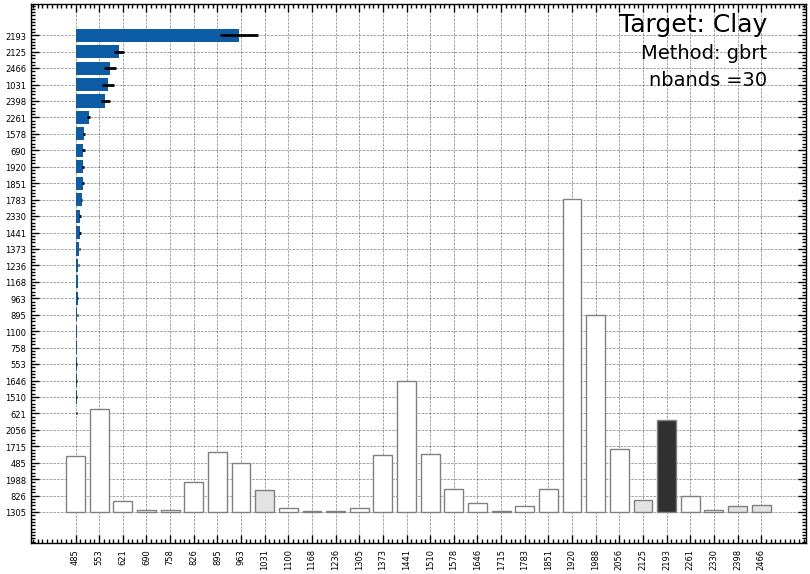

In [33]:
show_important_features_for ('Clay', model_details, feature_scores, 20, 150, 2)

### Model Accuracy versus n_bands

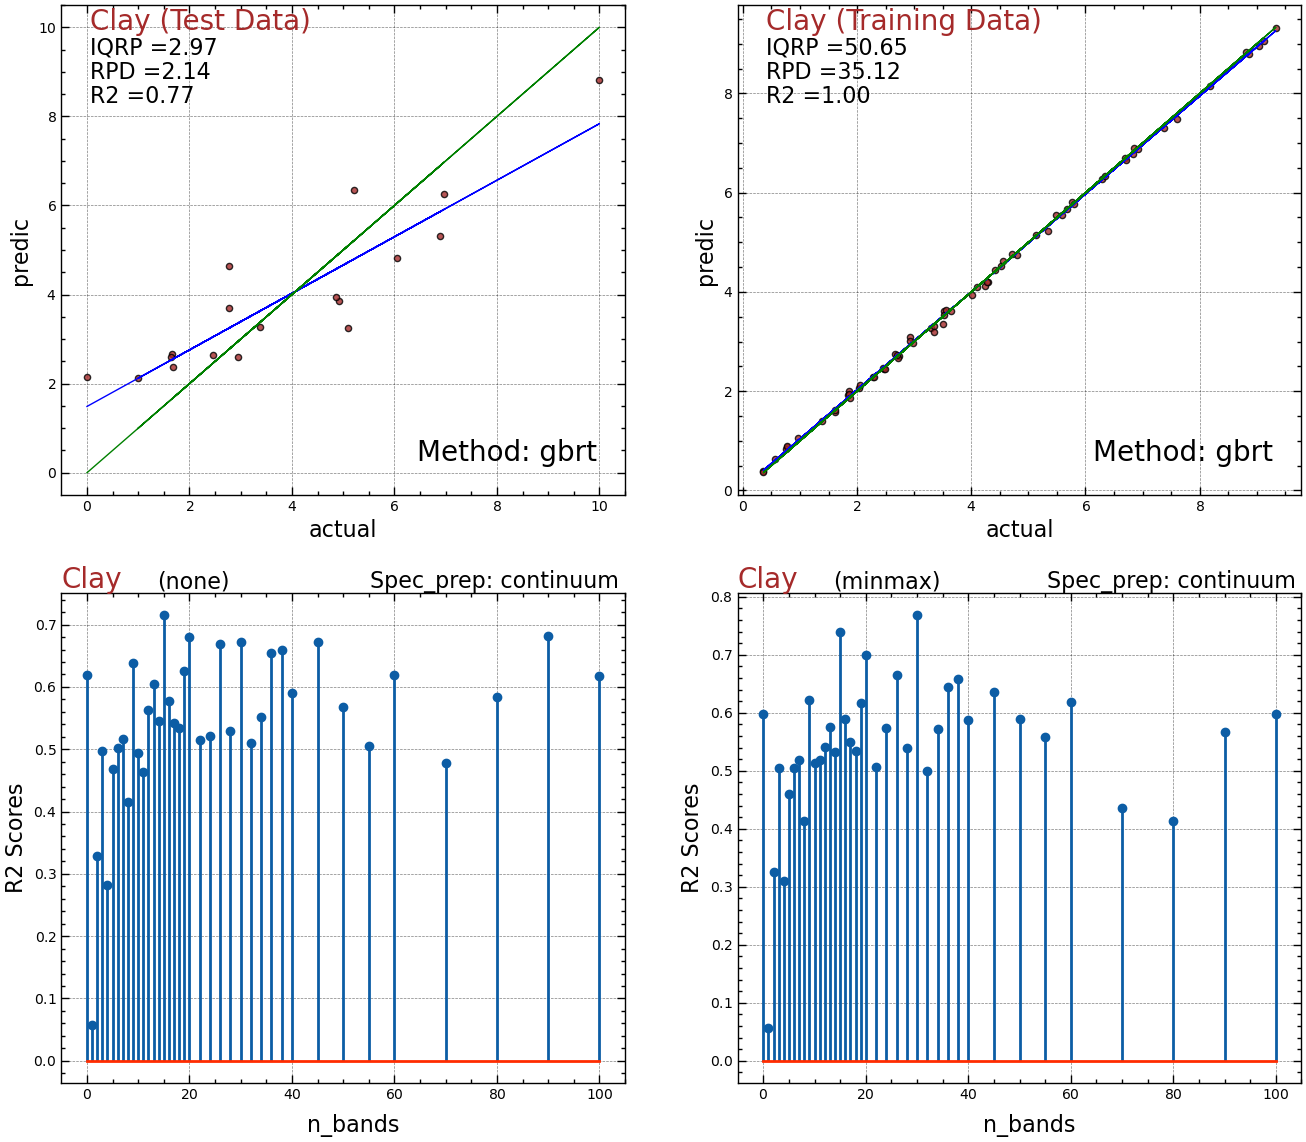

In [55]:
#For:Clay-> ['r2', 0.77, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :gbrt
plot_model_acc ('gbrt', 'Clay', 'minmax', 'continuum', 30)

##  4. TOC Model 

### Best performances corresponding to different methods.

In [34]:
best_score_for(Mtree, 'TOC', 'r2')

For:TOC-> ['r2', 0.65, 'Spec:', 'log', 'bands:', 18, 'Tar:', 'minmax'] :mult
For:TOC-> ['r2', 0.31, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :plsr
For:TOC-> ['r2', 0.71, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :randomforest
For:TOC-> ['r2', 0.7, 'Spec:', 'log', 'bands:', 34, 'Tar:', 'none'] :cubist
For:TOC-> ['r2', 0.26, 'Spec:', 'fod', 'bands:', 10, 'Tar:', 'minmax'] :svr
For:TOC-> ['r2', 0.45, 'Spec:', 'log', 'bands:', 100, 'Tar:', 'minmax'] :ridge
For:TOC-> ['r2', 0.81, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt


### gbrt : Best Model 

TOC -> [ iqrp - **2.51**, r2 - **0.81**, Spec - fod2, n_bands - 40, Tar - minmax] :   **gbrt**  <br/><br/>
***Description***: We get the best model for TOC when we use gbrt (gradient boosted regression tree) method. \
While training the model we utilize the fod (of the smoothed spectra which is resampled to 55 bands) and
TOC values are used by  normalizing it in the range of 0-10.

In [71]:
TOC_model_gbrt = GradientBoostingRegressor() 
TOC_model_gbrt.fit(fod_sampled[40], NT[3])

GradientBoostingRegressor()

40 most important wavebands for gbrt model :

In [36]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[40], NT[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[40], 'spec_proc': 'fod2', 'n_bands': 40}

Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
 For gbrt model 527, 2116 and 2321 are the three most important wavebands.

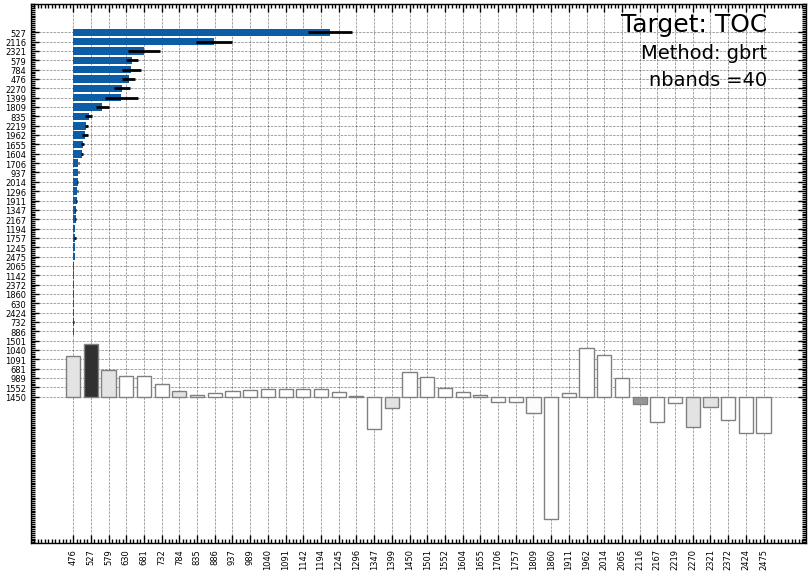

In [37]:
show_important_features_for ('TOC', model_details, feature_scores, 50, 70, 55)

### Model Accuracy versus n_bands

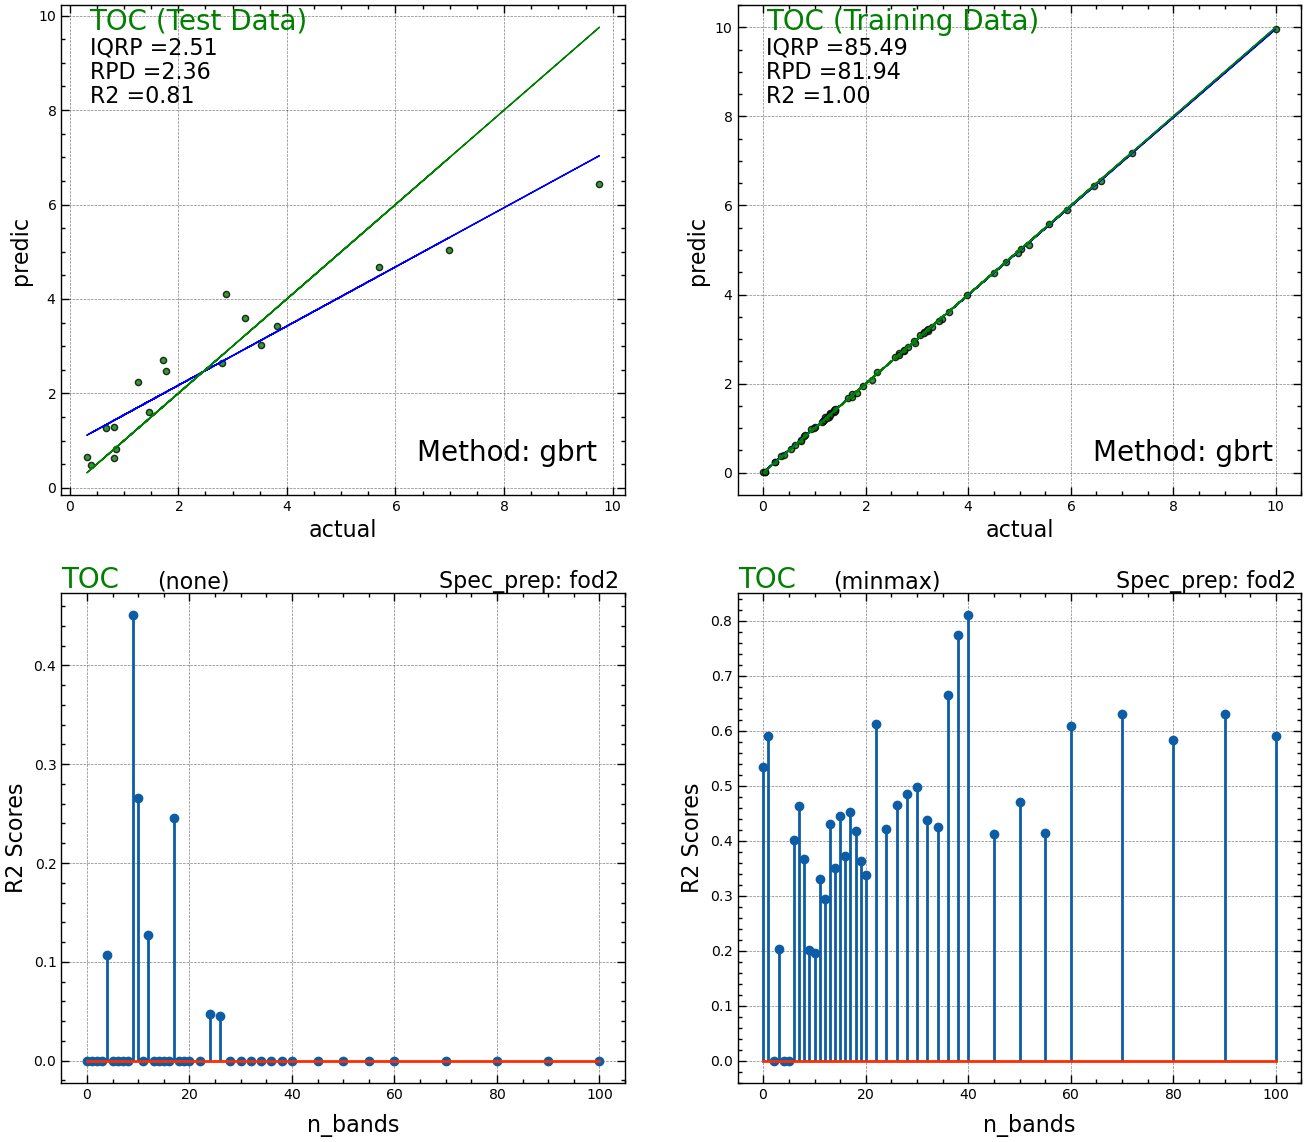

In [35]:
#For:TOC-> ['r2', 0.81, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt
plot_model_acc ('gbrt', 'TOC', 'minmax', 'fod2', 40)

## 5. CaCO3 Model 

### Best performances corresponding to different methods.

In [38]:
best_score_for(Mtree, 'CaCO3', 'r2')

For:CaCO3-> ['r2', 0.56, 'Spec:', 'fod', 'bands:', 7, 'Tar:', 'none'] :mult
For:CaCO3-> ['r2', 0.55, 'Spec:', 'continuum', 'bands:', 24, 'Tar:', 'minmax'] :plsr
For:CaCO3-> ['r2', 0.55, 'Spec:', 'fod', 'bands:', 10, 'Tar:', 'minmax'] :randomforest
For:CaCO3-> ['r2', 0.52, 'Spec:', 'log', 'bands:', 5, 'Tar:', 'none'] :cubist
For:CaCO3-> ['r2', 0.42, 'Spec:', 'fod', 'bands:', 24, 'Tar:', 'minmax'] :svr
For:CaCO3-> ['r2', 0.52, 'Spec:', 'log', 'bands:', 0, 'Tar:', 'none'] :ridge
For:CaCO3-> ['r2', 0.6, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt


### gbrt : Best Model

CaCO3 -> [ iqrp - **2.32**, r2 - **0.6**, Spec - none, n_bands - 3, Tar - none] :   **gbrt**  <br/><br/>
***Description***: We get the best model for CaCO3 when we use gbrt (gradient boosted regression tree ) method. \
While training the model we utilize the smoothed spectra which is resampled to 3 bands and
CaCO3 values are used without any preprocessing.

In [73]:
CaCO3_model_gbrt = GradientBoostingRegressor()
CaCO3_model_gbrt.fit(sampled_spec[3], T[4])

GradientBoostingRegressor()

3 most important wavebands for gbrt model :

In [40]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, sampled_spec[3], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': sampled_spec[3], 'spec_proc': 'spectra', 'n_bands': 3}

Bands shown in dark shades are important features (darkest band correspond to the most important feature). </br>
 For gbrt model 792 is the most important waveband.

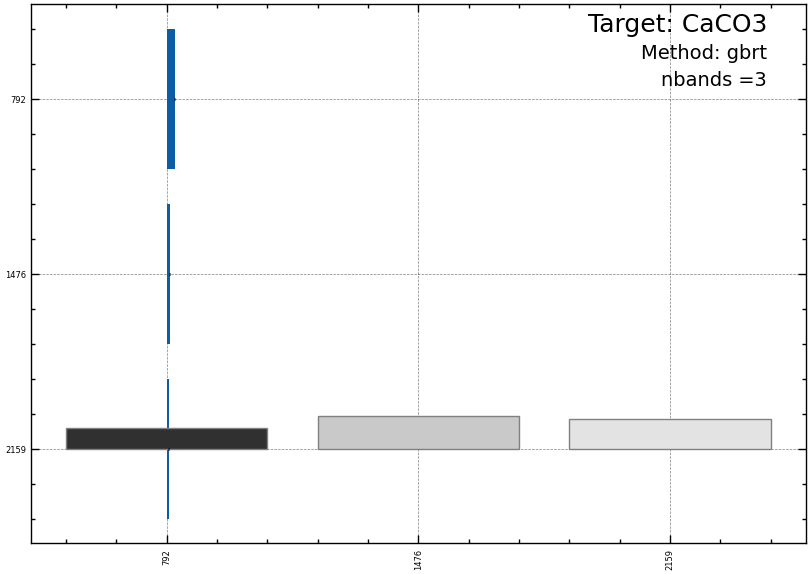

In [41]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.02, 0.5, 3)

### Model Accuracy versus n_bands

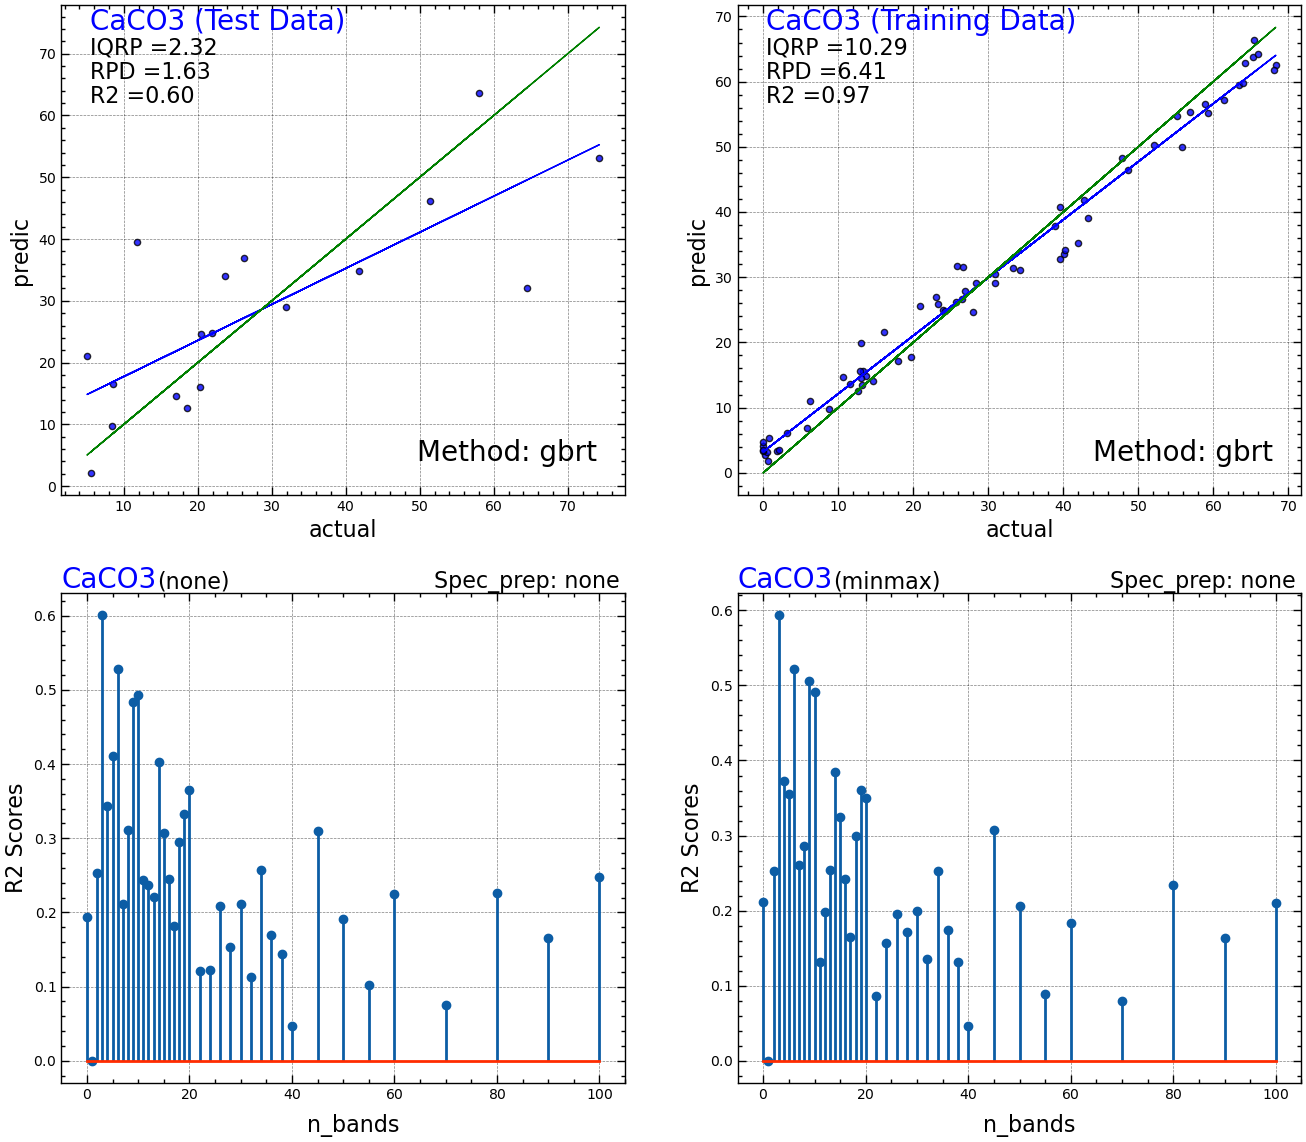

In [39]:
#For:CaCO3-> ['r2', 0.6, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt
plot_model_acc ('gbrt', 'CaCO3', 'none', 'none', 3)